<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Linear_Regression_Other_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Practice
### Student: Roniel Polanco
 <h4>FuseMachines Assignment</h4>


# Used Motorcycle Price Prediction

In this assignment you will implement a number of linear regression models to predict the price of a used motorcycle given its different features and perform necessary evaluations to check the model performance.

<b><div style="text-align: right">[TOTAL POINTS: 15]</div></b>

### Learning Objective

* Test the assumptions of linear regression and transform the dataset accordingly if necessary.

* Use the sklearn library to implement linear reression, ridge regression and lasso and evaluate their and calculate their $R^2$ score. 

* Implement and use the adjusted $R^2$ score to evaluate the performance of models with varying set of features.

* Implement the Ordinary Least Squares and Gradient descent method from scratch to find the parameters of Linear Regression.






## Imports

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import itertools

## Dataset Description

The dataset contains 500 samples of used motorcycle with some of their features and their resale value. The problem here is to predict the resale value of the motorcycle using its features. 

**Number of Instances:** 500

**Number of Attributes:** 5 (Input Features) + 1 (Target)



### Attribute Information

#### **Input Features**
All the feature values have already been scaled to a similar range so that you won't have to apply feature scaling.

- **Lot No.:** Lot number of the motorcycle. Higher Lot number signifies newer motorcycle.

- **Engine Size:** Size of the eingine of the motorcycle.

- **Mileage:** Measure of how long the motorcycle runs for a litre of gas.

- **KM Run:** Kilometers run on the motorcycle.

- **Max Power:** Maximum power output of the motorcycle.

\

#### **Target Variable**

- **Price:** Resale value of the motorcycle in thousands. Our target variable.


In [93]:
dataset = pd.read_csv('https://storage.googleapis.com/codehub-data/1-lv2-A-2-used_bikes.csv')
X = dataset.drop('Price', axis=1)
y = dataset['Price'].values.reshape(X.shape[0],1)
dataset.head()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
0,0.056646,-1.043517,0.797331,-0.222694,-1.863743,45.026610
1,0.238778,-0.417864,0.000508,0.866960,-0.312565,39.300833
2,-1.492397,0.936633,0.785432,-0.091035,2.423967,58.923446
3,1.132288,-0.583562,0.790543,1.262054,-1.121522,52.101286
4,1.318906,2.024895,0.996975,1.427730,4.410519,79.322492


Let's first calculate the residuals by quickly fitting the linear regression on the whole data using sklearn.

In [94]:
## RUN THIS CELL
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X.values, y)
y_hat = model.predict(X.values)
residuals = y_hat - y


## Part 1: Assumptions

### Exercise 1.1: Check for multicollinearity


**<div style="text-align: right"> [POINTS: 1]</div>**


**Task:**

* Import the [`variance_inflation_factor`]() from `statsmodel` library.

* Calculate the VIF score for each of the features using the `variance_inflation_factor` function.

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()

# YOUR CODE HERE
VIF['Factors'] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])] #Calculate VIF Value for each feature
VIF['Features'] = X.columns


print(VIF.round(1))

X = X.values

   Factors     Features
0      1.0      Lot No.
1     12.6  Engine Size
2      1.0      Mileage
3      1.0       KM Run
4     12.6    Max Power


Which two features are highly correlated?

 - Feature Index 1 and 4 are Highly Correlated



In [96]:
### RUN THIS CELL
%run ex1q1.py

ERROR:root:File `'ex1q1.py'` not found.


In [97]:
### INTENTIONALLY LEFT BLANK

**Removing Multicollinearity**

In [98]:
### RUN THIS CELL
#Inspect X before modify\
print('Shape of X',X.shape)
#End inspect
X = np.delete(X, 4, 1)
print('Values of X Before' ,  X.shape)


Shape of X (500, 5)
Values of X Before (500, 4)


### Exercise 1.2: Check for Homoscedasticity

**<div style="text-align: right"> [POINTS: 1]</div>**

**Task:**
- Assign the appropriate value for the `x_axis` and `y_axis` to plot the scatterplot of the samples (x-axis) and their corresponding residuals (y-axis).

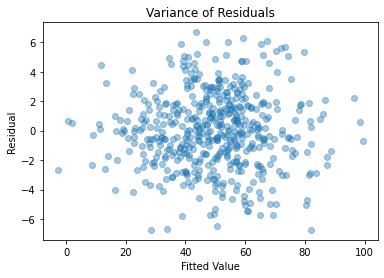

In [99]:
x_axis = y_hat
y_axis = residuals[:,0]

# YOUR CODE HERE
#raise NotImplementedError()

plt.scatter(x=x_axis, y=y_axis, alpha=0.4)
plt.title('Variance of Residuals')
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

Are the variance of the residuals uniform?
 - No, is not uniform
 


In [100]:
### RUN THIS CELL
%run ex1q2.py

ERROR:root:File `'ex1q2.py'` not found.


In [101]:
### INTENTIONALLY LEFT BLANK

### Exercise 1.3: Check for Auto-correlation

**<div style="text-align: right"> [POINTS: 1]</div>**


**Task:**

* Import the [`durbin_watson`]() from `statsmodel` library.

* Calculate the `durbin_watson_score` of the residuals using the `durbin_watson` function.

In [102]:
from statsmodels.stats.stattools import  durbin_watson


# YOUR CODE HERE
durbin_watson_score = durbin_watson(residuals)

print("Durbin Watson Scrore: ",durbin_watson_score)

Durbin Watson Scrore:  [2.07164064]


What type of autocorrelation do the residuals have?




In [103]:
### RUN THIS CELL
%run ex1q3.py

ERROR:root:File `'ex1q3.py'` not found.


In [104]:
### INTENTIONALLY LEFT BLANK

### Exercise 1.4: Check for Normality of residuals

**<div style="text-align: right"> [POINTS: 1]</div>**

**Task:**

* Import the [`normal_ad`]() from `statsmodel` library.

* Calculate the `p_value` of the residuals using the `normal_ad` function.

In [105]:
from statsmodels.stats.diagnostic import normal_ad

ret = normal_ad(X, axis=0)

p_value = ret[1]

print('P-Values for AD: ',p_value)

P-Values for AD:  [0.50851249 0.34172107 0.70407811 0.51228264]


In [106]:
### INTENTIONALLY LEFT BLANK 

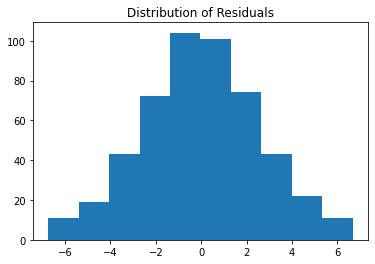

In [107]:
### RUN THIS CELL
plt.title('Distribution of Residuals')
plt.hist(residuals)
plt.show()

Are the residuals normally distributed?

 - Yes As you can see in the frequency table it has a Gaussian(normal) Distribution

In [108]:
### RUN THIS CELL

%run ex1q4.py

ERROR:root:File `'ex1q4.py'` not found.


## Train Test Split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Part 2: Implementation using Sklearn

In this section, you will implement and validate linear regression using sklearn. You will use the easy and quick interface of sklearn to try out models with different combinations of the features and select the best combination of features using the Adjusted $R^2$ score. 

### Exercise 2.1: Adjusted $R^2$

**<div style="text-align: right"> [POINTS: 1]</div>**

The sklearn library has a number of functions to calculate different performance metrics but it misses out on the adjusted $R^2$ score. So in this section you will implement the function `adjusted_r2_score` that computes adjusted $R^2$ score for a model.

Recall: $$\text{Adjusted}\ {R^2} = 1- (1-R^2)\frac{n-1}{n-d-1}$$

\

**Tasks:** Complete the function `adjusted_r2_score` by computing the adjusted $R^2$ score.

* Compute the $R^2$ score using the `r2_score` function from sklearn and store it in `r2`.

* Compute the adjusted $R^2$ using the previously calculated $R2$ and store it in `adj_r2`. 

In [110]:
def adjusted_r2_score(y_test, y_pred):
    n = X.shape[0]
    d = X.shape[1]

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1-r2) * (n-1) / (n-d-1))

    return adj_r2

In [111]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred =lr.predict(X_test)
print('R2:', r2_score(y_test, pred))
print('Adjusted R2: ', adjusted_r2_score(y_test, pred))


R2: 0.9746372132291662
Adjusted R2:  0.9744322614168767


In [112]:
### INTENTIONALLY LEFT BLANK

### Exercise 2.2: Linear Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`LinearRegression`]() class from sklearn to build a number of linear regression models. Each model will use a particular combination of the available features. You will calculate the adjusted $R^2$ score of each of these models and see which particular combination of the features is the best.


**Tasks:** 

* Instantiate an object `linear_regression` of the `LinearRegression` class.

* Fit the object `linear_regression` on the temporary training set `X_train_temp`.

* Use the fitted `linear_regression` object to predict the output of the temporary test set `X_test_temp`. Store the predicted values in the variable `y_pred`.

* Calculate the adjusted $R^2$ score for the model using the `adjusted_r2_score` you defined earlier and store it in `adj_r2`.


In [113]:
# Creating random combinations of the features
features_combinations = []
for L in range(1, X.shape[1]+1):
    for subset in itertools.combinations(range(X.shape[1]), L): #Here we make a combination of the diferent models 
        features_combinations.append(list(subset))

models = dict() # dictionary to store the parameters of different models
models_r2 = dict() # dictionary to store the different model's adjusted r2 score 

for features in features_combinations:
    X_train_temp = X_train[:, features]
    X_test_temp = X_test[:, features]
    
    linear_regression = LinearRegression().fit(X_train_temp, y_train)
    y_pred = linear_regression.predict(X_test_temp)
    adj_r2 = adjusted_r2_score(y_test, y_pred)

    # YOUR CODE HERE
    

    models[str(features)] = np.c_[linear_regression.intercept_, linear_regression.coef_]  
    models_r2[str(features)] = adj_r2

print("Different linear regression models and their adjusted r2 score")
for key in models_r2.keys():
  print("{}: {}".format(key, models_r2[key]))
best = max(models_r2, key=models_r2.get)
print("Best model: {} Parameters: {}".format(best, models[best])) 

Different linear regression models and their adjusted r2 score
[0]: 0.1359722741951186
[1]: 0.2811554123307879
[2]: 0.263380957203165
[3]: 0.2139019727421716
[0, 1]: 0.4196704828783978
[0, 2]: 0.47488637964989755
[0, 3]: 0.3557706439289616
[1, 2]: 0.6185596495462227
[1, 3]: 0.5037594011669297
[2, 3]: 0.4073443406712832
[0, 1, 2]: 0.8404117424466044
[0, 1, 3]: 0.639217851526068
[0, 2, 3]: 0.6165822910055554
[1, 2, 3]: 0.7555098315924497
[0, 1, 2, 3]: 0.9744322614168768
Best model: [0, 1, 2, 3] Parameters: [[50.25299626  7.25576172  9.57649649 10.0929504  -6.006947  ]]


In [114]:
### INTENTIONALLY LEFT BLANK

### Exercise 2.3: Ridge Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`Ridge`]() class from sklearn to build a ridge regression model. You will use all 4 features as you have seen that they result in the best adjusted $R^2$.

**Tasks:** 

* Import the  `Ridge` class from sklearn and instantiate the class as `ridge_regression`.

* Fit the object `rige_regression` on the  training set `X_train`.

* Use the fitted `rige_regression` object to predict the output of the  test set `X_test`. Store the predicted values in the variable `y_pred`.

* Calculate the $R^2$ score for the model using the [`r2_score`]() function from sklearn and store it in `r2`.



In [115]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)


# YOUR CODE HERE
print(ridge_regression)

print("R2 score for Ridge Regression: ",r2)
print("Parameters: ", np.c_[ridge_regression.intercept_, ridge_regression.coef_])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2 score for Ridge Regression:  0.9746516523387053
Parameters:  [[50.2498614   7.23318567  9.54305159 10.06760406 -5.98829548]]


In [116]:
### INTENTIONALLY LEFT BLANK

### Exercise 2.4: LASSO Regression using sklearn

<b><div style="text-align: right">[POINTS: 2]</div></b>

In this exercise, you will use the [`Lasso`]() class from sklearn to build a lasso regression model. You will use all 4 features as you have seen that they result in the best adjusted $R^2$.

**Tasks:** 

* Import the  `Lasso` class from sklearn and instantiate the class as `lasso_regression`

* Fit the object `lasso_regression` on the temporary training set `X_train_temp`.

* Use the fitted `lasso_regression` object to predict the output of the temporary test set `X_test_temp`. Store the predicted values in the variable `y_pred`.

* Calculate the $R^2$ score for the model using the [`r2_score`]() function from sklearn and store it in `r2`.



In [117]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X_train_temp, y_train)
y_pred = lasso_regression.predict(X_test_temp)
r2 = r2_score(y_test,y_pred)

# YOUR CODE HERE


print("R2 score for Lasso Regression: ",r2)
print("Parameters: ", np.r_[lasso_regression.intercept_, lasso_regression.coef_])
# lasso.coef_
#np.r_[lasso_regression.intercept_, lasso_regression.coef_]

R2 score for Lasso Regression:  0.9746938727570693
Parameters:  [50.2393051   7.15033811  9.44860135 10.00563034 -5.90032349]


In [118]:
### INTENTIONALLY LEFT BLANK

## Part 3: Implementation from Scratch

In this section, you will implement the OLS and Gradient descent algorithm from scratch to learn the parameters of the linear regression model. But first let's add the column of ones for intercept in the training and test set.

In [119]:
### RUN THIS CELL
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

### Exercise 3.1: Linear Regression using OLS

**<div style="text-align: right"> [POINTS: 1]</div>**

In this exercise, you will implement the normal equation of OLS to find the parameters of Linear regression.

Recall: $$\boldsymbol{\beta} =(\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$$

\\

**Task:**

* Complete the function `normal_equation` by implementing the normal equation to find the parameters `betas`.

Parameters:  [[50.25299626  7.25576172  9.57649649 10.0929504  -6.006947  ]]


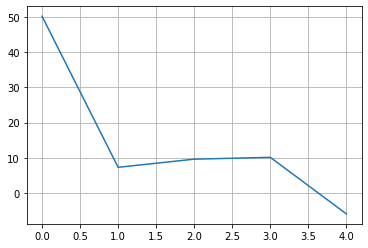

In [120]:
def normal_equation(X,y):

    X_transpose = X.T
    betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    # YOUR CODE HERE
    return betas

model_OLS = normal_equation(X_train,y_train)
print("Parameters: ", model_OLS.reshape(1,-1))
plt.plot(model_OLS)
plt.grid()
plt.show()

In [121]:
### INTENTIONALLY LEFT BLANK

### Exercise 3.2: Linear Regression using Gradient Descent
**<div style="text-align: right"> [POINTS: 3]</div>**

In this exercise, you will mplement the gradient descent algorithm to find the parameters of linear regression.

**Tasks:** Complete the following function to implement the gradient descent algorithm.

* Initialize `betas` randomly from values sampled from normal distribution

* Calculate the `gradients` for the `betas`. $[\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y})]$ 

* Update the `betas` using their `gradients`.$[\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \boldsymbol{\frac{\partial J}{\partial \beta}}]$

* Calculate the cost for the `betas` using the Linear Regression's cost function. $[J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2]$



In [122]:
def initialize_betas(X,y):
  np.random.seed(0)
  betas = np.random.randn(X.shape[1],1) #Number of features 
  return betas


In [123]:
# Inspect Betas
initialize_betas(X_train,y_train)

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ],
       [1.86755799]])

### Cost Function
$J(\beta) = {1\over{2}} \sum{(X\beta - y)^2}$

In [124]:
def calculate_cost(betas,X, y):
  dot_product =np.dot(X, betas)
  return 1/2 * np.sum(np.square(dot_product - y))

In [125]:
# inspect Cost
betas =initialize_betas(X_train,y_train)
calculate_cost(betas,X_train,y_train)

437173.1511044539

### Calculate Gradients
 $[\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y})]$
 

In [126]:
def calculate_gradients(betas, X, y):
  y_hat = np.dot(X,betas)
  return np.dot(X.T, (y_hat - y))


In [127]:
def gradient_descent(X, y, alpha=0.0001 , max_iters=10000, precision = 1e-3):
  np.random.seed(0)
  n = X.shape[0]
  d = X.shape[1]

  iteration = 0 # no. of iterations
  difference = 1 # difference between the cost of current iteration and previous iteration
  costs = [1e12] # list containing the history of costs for different iterations 
  
  betas = None
  gradients = None
  cost = None

  # Initialize betas
  # YOUR CODE HERE
  betas = initialize_betas(X,y)
  
  while difference > precision and iteration <= max_iters :
    
    # Calculate gradients
    # YOUR CODE HERE
    gradients = calculate_gradients(betas,X,y)

    # Update betas
    # YOUR CODE HERE
    betas  = betas - alpha * gradients

    # Calculate cost
    # YOUR CODE HERE
    cost = calculate_cost(betas, X, y)
    
    difference = np.abs(costs[iteration] - cost) 
    costs.append(cost)
    
    iteration += 1
    
    if(cost == np.infty):
      print("Cost reached infinity, try smaller learning rate")
      break
    
  return betas, iteration, costs

model_GD, steps, costs = gradient_descent(X_train, y_train, alpha=0.0009)
print("Parameters: ", model_GD.reshape(1,-1))

Parameters:  [[50.2517799   7.25534005  9.57489678 10.09293198 -6.00584191]]


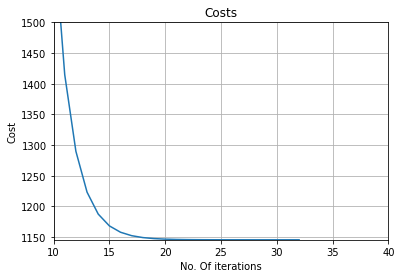

In [130]:
#Plotting Costs 

plt.plot(costs)
plt.title('Costs')
plt.xlabel('No. Of iterations')
plt.ylabel('Cost')
plt.ylim(min(costs), 1500)
plt.xlim(10,40)
plt.grid()
plt.show()

In [129]:
### INTENTIONALLY LEFT BLANK

#### Well done!